In [9]:
# Install library for reading JPK File
# %pip uninstall pyafmreader --yes
%pip install git+https://github.com/jlopezalo/pyafmreader.git

  Cloning https://github.com/jlopezalo/pyafmreader.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-7tg8eo33
  Running command git clone -q https://github.com/jlopezalo/pyafmreader.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-7tg8eo33
  Cloning https://github.com/TkTech/fasterzip.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-8c_mb3gr/fasterzip_0a8fd47b251c4795be872fa7947a4a71
  Running command git clone -q https://github.com/TkTech/fasterzip.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-8c_mb3gr/fasterzip_0a8fd47b251c4795be872fa7947a4a71
  Using cached numpy-1.21.6-cp38-cp38-macosx_10_9_x86_64.whl (16.9 MB)
  Created wheel for pyafmreader: filename=pyafmreader-x.x.x-py3-none-any.whl size=22804 sha256=9ff143815d3f1157d2e8e8021364f7ce5e12ff0ed6b9261133cfc27cea41c641
  Stored in directory: /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-ephem-wheel-cache-asd4qz1

In [10]:
# Install library for AFM data Rheology Analysis
# %pip uninstall pyafmrheo --yes
%pip install git+https://github.com/jlopezalo/pyafmrheo.git

  Cloning https://github.com/jlopezalo/pyafmrheo.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-lqmhygxr
  Running command git clone -q https://github.com/jlopezalo/pyafmrheo.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-lqmhygxr
  Using cached numpy-1.23.0-cp38-cp38-macosx_10_9_x86_64.whl (18.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vampireanalysis 3.4.5 requires numpy==1.17.4, but you have numpy 1.23.0 which is incompatible.
vampireanalysis 3.4.5 requires pandas==0.25.3, but you have pandas 1.4.2 which is incompatible.
vampireanalysis 3.4.5 requires scipy==1.3.3, but you have scipy 1.8.0 which is incompatible.
pyafmreader x.x.x requires nu

In [12]:
# Import libraries we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend

# Get file reader from library
from pyafmreader import loadfile

# Get data analysis tools
from pyafmrheo.utils.force_curves import *
from pyafmrheo.utils.signal_processing import *
from pyafmrheo.models.rheology import ComputePiezoLag

ImportError: cannot import name 'get_force_vs_indentation_curve' from 'pyafmrheo.utils.force_curves' (/opt/anaconda3/lib/python3.8/site-packages/pyafmrheo/utils/force_curves.py)

In [4]:
# Define global variables
file_path = '/Users/javierlopez/Desktop/Data/javistuff/Gels-15122021/HeadPiezo/Calibration/force-save-2021.12.15-16.00.36.002.jpk-force'
# Shapes available: paraboloid, pyramid
indenter_shape = "pyramid"
# tip_parameter = 500 * 1e-9 # meters
tip_parameter = 35 # degrees
# Poisson ratio
poisson_ratio = 0.5
# If None it will use the deflection sensitivity from the file
deflection_sensitivity = None # m/V
# If None it will use the spring constant from the file
spring_constant = None # N/m
# General plotting params
plt.rcParams["figure.figsize"] = (10,5)

In [5]:
file = loadfile(file_path)

In [6]:
file_metadata = file.file_metadata

In [7]:
closed_loop = file_metadata['z_closed_loop_status']
file_deflection_sensitivity = file_metadata['original_deflection_sensitivity'] #nm/V
file_spring_constant = file_metadata['original_spring_constant'] #N/m
height_channel = file_metadata['height_channel_key']

if not deflection_sensitivity: deflection_sensitivity = file_deflection_sensitivity / 1e9 #m/V
if not spring_constant: spring_constant = file_spring_constant

In [8]:
curve_idx = 0
force_curve = file_data[curve_idx]
extend_segments = force_curve.extend_segments
pause_segments = force_curve.pause_segments
modulation_segments = force_curve.modulation_segments
retract_segments = force_curve.retract_segments
force_curve_segments = [*extend_segments, *pause_segments, *modulation_segments, *retract_segments]
force_curve_segments = sorted(force_curve_segments, key=lambda x: int(x[0]))

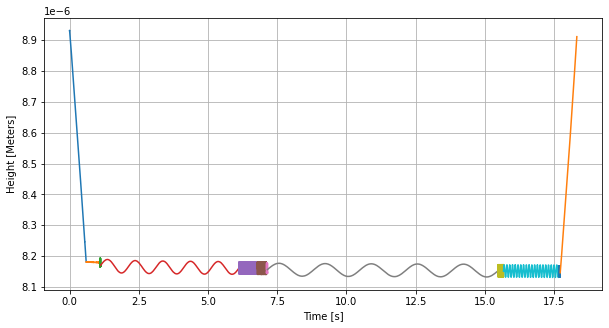

In [9]:
t0 = 0
for seg_id, segment in force_curve_segments:
    height = segment.segment_formated_data[height_channel]
    time = segment.segment_formated_data["time"] + t0
    plt.plot(time, height)
    t0 = time[-1]

plt.xlabel("Time [s]")
plt.ylabel("Height [Meters]")
plt.grid()
plt.show()

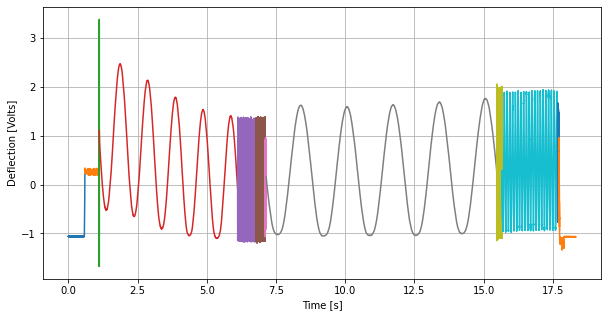

In [10]:
t0 = 0
for seg_id, segment in force_curve_segments:
    deflection = segment.segment_formated_data["vDeflection"]
    time = segment.segment_formated_data["time"] + t0
    plt.plot(time, deflection)
    t0 = time[-1]

plt.xlabel("Time [s]")
plt.ylabel("Deflection [Volts]")
plt.grid()
plt.show()

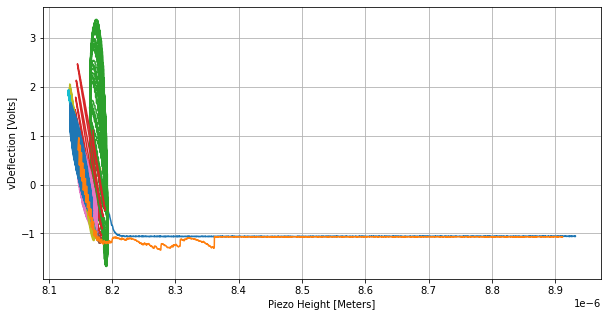

In [11]:
for seg_id, segment in force_curve_segments:
    height = segment.segment_formated_data[height_channel]
    deflection = segment.segment_formated_data["vDeflection"]
    plt.plot(height, deflection)

plt.xlabel("Piezo Height [Meters]")
plt.ylabel("vDeflection [Volts]")
plt.grid()
plt.show()

In [12]:
# Get retract, last retract segment
last_ret_seg_id, last_ret_seg = retract_segments[-1]
ret_deflection, ret_height, ret_time =\
    preprocess_segment(last_ret_seg, height_channel, deflection_sensitivity)

if modulation_segments:
    modulation_data = {}
    for seg_id, seg_data in modulation_segments:
        segment_data = {}
        mod_deflection, mod_height, mod_time =\
            preprocess_segment(seg_data, height_channel, deflection_sensitivity)
        segment_data['height'] = mod_height
        segment_data['deflection'] = mod_deflection
        segment_data['time'] = mod_time
        modulation_data[seg_id] = segment_data

In [13]:
# Shift height
xzero = ret_height[-1] # Maximum height
if modulation_segments:
    for segment_data in modulation_data.values():
        segment_data['height'] = xzero - segment_data['height']

In [14]:
help(ComputePiezoLag)

Help on function ComputePiezoLag in module pyafmrheo.models.rheology:

ComputePiezoLag(zheight, deflection, fs, freq, nfft=None, freq_tol=0.0001)



In [15]:
results = []

for seg_id, seg_data in modulation_segments:
    frequency = seg_data.segment_metadata["frequency"]
    data = modulation_data[seg_id]
    time = data['time']
    zheight = data['height']
    delfection = data['deflection']
    deltat = time[1] - time[0]
    fs = 1 / deltat
    ntra_in, ntra_out, ntra_time =\
        detrend_rolling_average(frequency, zheight, delfection, time, 'indentation', 'force', [])
    fi, amp_quotient, gamma2 =\
        ComputePiezoLag(ntra_in, ntra_out, fs, frequency)
    results.append((frequency, fi, amp_quotient, gamma2))

results = sorted(results, key=lambda x: int(x[0]))
frequencies_results = [x[0] for x in results]
fi_results = [x[1] for x in results]
amp_quotient_results = [x[2] for x in results]

The frequency found at index 799.789529071297 does not match with the frequency applied 800.0
The frequency found at index 1999.4738226782424 does not match with the frequency applied 2000.0
The frequency found at index 0.9966777408637872 does not match with the frequency applied 1.0
The frequency found at index 59.98421468034728 does not match with the frequency applied 60.0
The frequency found at index 119.96842936069456 does not match with the frequency applied 120.0
The frequency found at index 1199.6842936069454 does not match with the frequency applied 1200.0
The frequency found at index 0.5980066445182725 does not match with the frequency applied 0.6
The frequency found at index 199.89479221462386 does not match with the frequency applied 200.0
The frequency found at index 9.994447529150474 does not match with the frequency applied 10.0


/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


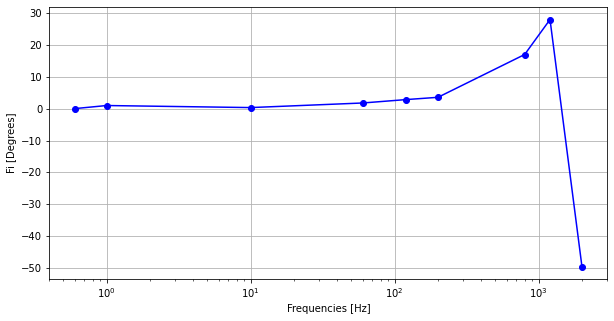

In [16]:
plt.plot(frequencies_results, fi_results, "bo-")
plt.xlabel("Frequencies [Hz]")
plt.ylabel("Fi [Degrees]")
plt.grid()
plt.xscale("log")
plt.show()

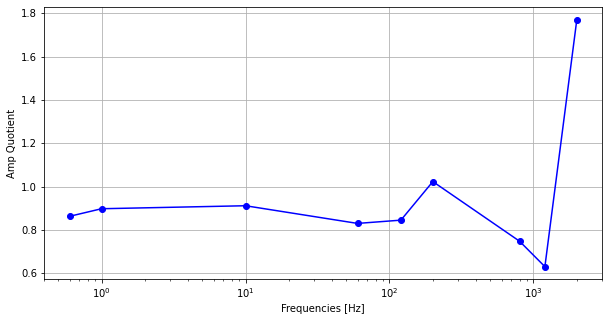

In [17]:
plt.plot(frequencies_results, amp_quotient_results, "bo-")
plt.xlabel("Frequencies [Hz]")
plt.ylabel("Amp Quotient")
plt.grid()
plt.xscale("log")
plt.show()